# Importing Data in Python (Part 1)
https://www.datacamp.com/courses/importing-data-in-python-part-1

### Loading the files

In [0]:
# links
URL2 = 'https://assets.datacamp.com/production/course_1607/datasets/L-L1_LOSC_4_V1-1126259446-32.hdf5'
URL3 = 'https://assets.datacamp.com/production/course_1607/datasets/battledeath.xlsx'
URL4 = 'https://assets.datacamp.com/production/course_1607/datasets/disarea.dta'
URL5 = 'https://assets.datacamp.com/production/course_1607/datasets/ja_data2.mat'
URL6 = 'https://assets.datacamp.com/production/course_1607/datasets/mnist_kaggle_some_rows.csv'
URL7 = 'https://assets.datacamp.com/production/course_1607/datasets/sales.sas7bdat'
URL8 = 'https://assets.datacamp.com/production/course_1607/datasets/seaslug.txt'
URL9 = 'https://assets.datacamp.com/production/course_1607/datasets/titanic_sub.csv'

In [2]:
from urllib.request import urlretrieve

urlretrieve(URL2, 'LIGO_data.hdf5')
urlretrieve(URL3, 'battledeath.xlsx')
urlretrieve(URL4, 'disarea.dta')
urlretrieve(URL5, 'albeck_gene_expression.mat')
urlretrieve(URL6, 'digits.csv')
urlretrieve(URL7, 'sales.sas7bdat')
urlretrieve(URL8, 'seaslug.txt')
urlretrieve(URL9, 'titanic.csv')

('titanic.csv', <http.client.HTTPMessage at 0x7f3b4f341e80>)

## 1. Introduction and flat files

### Exploring your working directory

In [3]:
!ls

albeck_gene_expression.mat  disarea.dta     sample_data
battledeath.xlsx	    LIGO_data.hdf5  seaslug.txt
digits.csv		    sales.sas7bdat  titanic.csv


In [4]:
import os
wd = os.getcwd()
os.listdir(wd)

['.config',
 'sample_data',
 'titanic.csv',
 'battledeath.xlsx',
 'seaslug.txt',
 'disarea.dta',
 'digits.csv',
 'LIGO_data.hdf5',
 'albeck_gene_expression.mat',
 'sales.sas7bdat']

### Importing entire text files

In [5]:
# Open a file: file
file = open('seaslug.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0
0	0.5
0	0.467
0	0.857
0	0.5
0	0.357
0	0.533
5	0.467
5	0.467
5	0.125
5	0.4
5	0.214
5	0.4
10	0.067
10	0.067
10	0.333
10	0.333
10	0.133
10	0.133
15	0.267
15	0.286
15	0.333
15	0.214
15	0
15	0
20	0.267
20	0.2
20	0.267
20	0.437
20	0.077
20	0.067
25	0.133
25	0.267
25	0.412
25	0
25	0.067
25	0.133
30	0
30	0.071
30	0
30	0.067
30	0.067
30	0.133
False
True


### Importing text files line by line

In [6]:
# Read & print the first 3 lines
with open('seaslug.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

Time	Percent

99	0.067

99	0.133



### Using NumPy to import flat files

<class 'numpy.ndarray'>


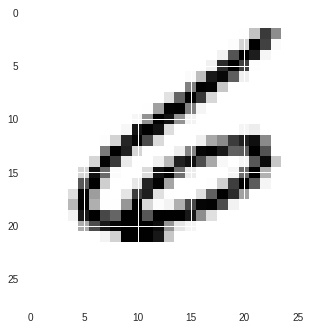

In [7]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

### Customizing your NumPy import

In [8]:
# Assign the filename: file
file = 'seaslug.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0])

# Print data
print(data)

[99. 99. 99. 99. 99.  0.  0.  0.  0.  0.  0.  5.  5.  5.  5.  5.  5. 10.
 10. 10. 10. 10. 10. 15. 15. 15. 15. 15. 15. 20. 20. 20. 20. 20. 20. 25.
 25. 25. 25. 25. 25. 30. 30. 30. 30. 30. 30.]


### Importing different datatypes

['Time' 'Percent']
[0.    0.357]


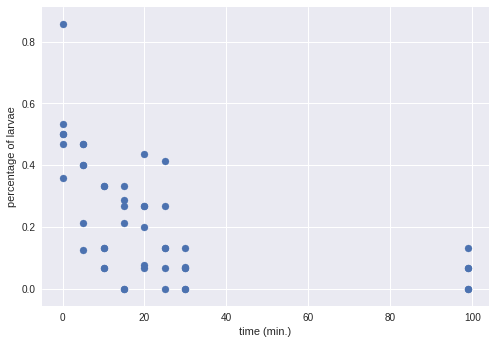

In [9]:
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

### Working with mixed datatypes (1)

In [10]:
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None, encoding=None)
print(np.shape(data))
data[0]

(891,)


(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171', 7.25, '', 'S')

### Working with mixed datatypes (2)

In [11]:
# Assign the filename: file
file = 'titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file, encoding=None)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S')
 (2, 1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
 (3, 1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S')]


### Using pandas to import flat files as DataFrames

In [12]:
# Import pandas
import pandas as pd

# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = np.array(data)

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


## 2. Importing data from other file types

### Loading a pickled file

In [13]:
# 'data.pkl' missing

'''
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('data.pkl', mode='rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))
'''

"\n# Import pickle package\nimport pickle\n\n# Open pickle file and load data: d\nwith open('data.pkl', mode='rb') as file:\n    d = pickle.load(file)\n\n# Print d\nprint(d)\n\n# Print datatype of d\nprint(type(d))\n"

### Listing sheets in Excel files

In [14]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 2.6MB/s 


In [15]:
# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['2002', '2004']


### Importing sheets from Excel files

In [16]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xl.parse('2002')

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


### Customizing your spreadsheet import

In [17]:
# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000


### Importing SAS files

In [18]:
!pip install sas7bdat

  Running setup.py bdist_wheel for sas7bdat ... - \ done
  Stored in directory: /root/.cache/pip/wheels/ff/aa/3e/79e974cf4258c5a5a97474db043f09473f38e1800ff1b82395
Successfully built sas7bdat


     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


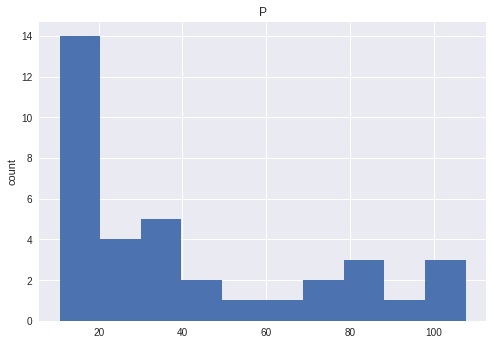

In [19]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

### Importing Stata files

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8   ...    disa16  disa17  disa18  disa19  disa20  disa21  \
0   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
1   0.56    0.0   ...       0.0     0.4     0.0    0.61    0.00     0.0   
2   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
3   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
4   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.05     0.0   

   disa22  disa23  disa24  disa25  
0    0.00    0.02    0.00    0.00  
1    0.99    0.98   

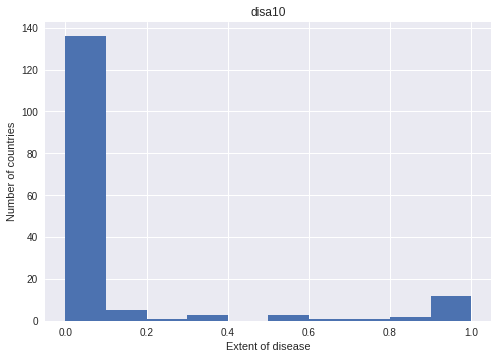

In [20]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

### Importing HDF5 files

In [22]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file,'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


### Extracting data from your HDF5 file

Strain


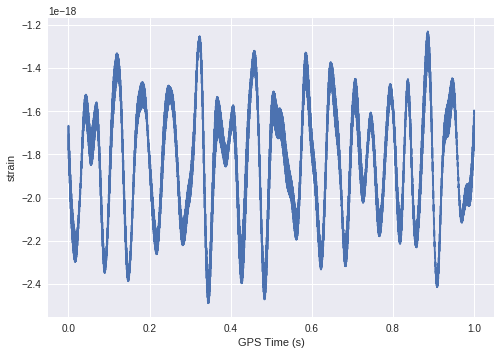

In [23]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

### Importing MATLAB files


In [24]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


### The structure of .mat in Python

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


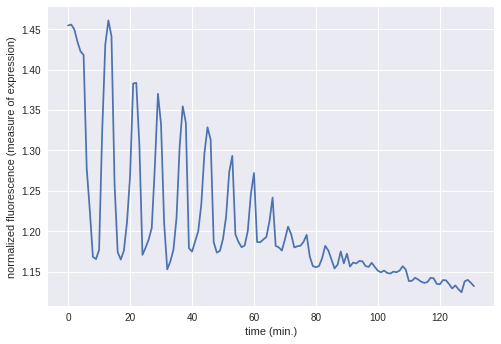

In [25]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()